<a href="https://colab.research.google.com/github/Stephen-Njuguna/Moringa_school-_IP-_Week-9/blob/main/Moringa_school_IP_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset using KNN**

## Defining the Question 
Creating a model that would predict if a passager Survived or died during the titanic tragedy

## Defining Metrics of success


Being able to create a model that has an accuracy of more than 70% and can predicts if a passager survived or died in the titanic tragedy

## Understanding the Content 



The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster

## Recording the Experimental Design
1.   Importing the libraries
2.   Loading and viewing the dataset
3.   Cleaning the data.
4.   Univariate analysis
5.   Bivariate analysis
6.   KNN model
7. Conclusion and Recommendation

## Reading Data

In [114]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [115]:
#Loading Datasets
data = pd.read_csv('titanic_train.csv')

## Checking Data

In [116]:
# Determining the no. of records in our dataset
#
data.shape

(891, 12)

In [117]:
# Previewing the Dataset
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [118]:
#checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Define the appropriateness of the available data
The dataset provided is appropriate to answer the question because it has all the variables required to predict if a passager survived or died during the titanic tragedy

## Data Cleaning 

In [119]:
#Droping columns that are not necessary 
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [120]:
#Convert catorical data to numeric data 
en = LabelEncoder()
data['Sex'] = en.fit_transform(data['Sex'])
data['Embarked'] = en.fit_transform(data['Embarked'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


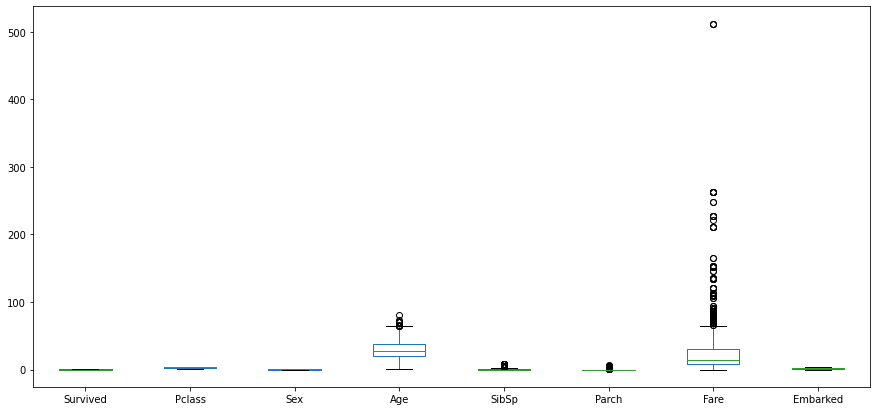

In [121]:
#checking for outliers 
data.boxplot(['Survived','Pclass','Sex','Age','SibSp','Parch','Fare',	'Embarked'],grid=False,figsize= [15,7])

There is an outlier in the fare column. There is a fare of 512.3292, that is very high compared to what other passagers paid in different classes

In [122]:
#Checking for missing values 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [123]:
#Dealing with missing values
#step one drop cabin because over 70% of its data is missing 
data.drop('Cabin',axis=1,inplace=True)

#Step two fill the missing values in age by grouping them by passager Class
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
data['Age'] = data[['Age', 'Pclass']].apply(age_approx, axis=1)

## Exploratory Data Analysis

### Univeriate Analysis

In [124]:
#data Description 
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [125]:
#Check multicolinearity 
#check for multicollinearity 
X = data.drop('Survived',axis=1)
independent_only = X.corr()
#computing the VIF
pd.DataFrame(np.linalg.inv(independent_only.values), index = independent_only.index, columns=independent_only.columns)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.007547,0.030520,-0.047992,-0.008975,0.065771,-0.036580,-0.010261,-0.018295
Pclass,0.030520,1.774931,-0.152173,0.574282,-0.116368,-0.118550,0.910160,-0.045910
Sex,-0.047992,-0.152173,1.111795,-0.112719,0.004554,0.244788,0.060486,-0.088216
Age,-0.008975,0.574282,-0.112719,1.301996,0.215613,0.083700,0.065351,-0.072734
SibSp,0.065771,-0.116368,0.004554,0.215613,1.292986,-0.444015,-0.223210,-0.100147
Parch,-0.036580,-0.118550,0.244788,0.083700,-0.444015,1.321091,-0.264032,-0.085247
Fare,-0.010261,0.910160,0.060486,0.065351,-0.223210,-0.264032,1.649275,0.241142
Embarked,-0.018295,-0.045910,-0.088216,-0.072734,-0.100147,-0.085247,0.241142,1.079431


All the independent variables have a VIF score of 1, this means they are no correlated to each other.


### Biavariate Analysis

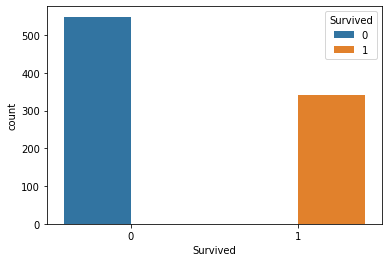

In [131]:
#Plot a barplot of survived 
sns.countplot(data['Survived'],hue='Survived',data=data)
plt.show()

Passagers that died during the targedy were more than those that survived 

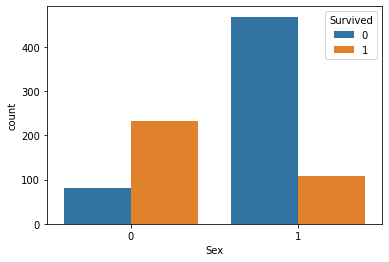

In [128]:
#Plotting a bar graph of survival per gender 
sns.countplot(x='Sex', data=data, hue='Survived')
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})
plt.show()

More males than females survived

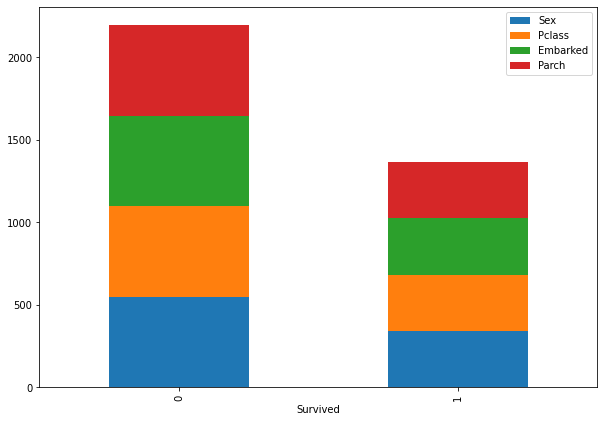

In [79]:
#Plot a stacked bar graph of survived aganist other independent varaibles 
x= data[['Sex','Pclass','Embarked','Parch']]

y= x.set_index(data['Survived'])
z=y.groupby('Survived').count()
z.plot.bar(stacked=True, figsize = [10,7])
plt.show()

There is a high contribution by Sex,Pclass,Embarked,Parch to weather a passager survived or died in the tragedy 

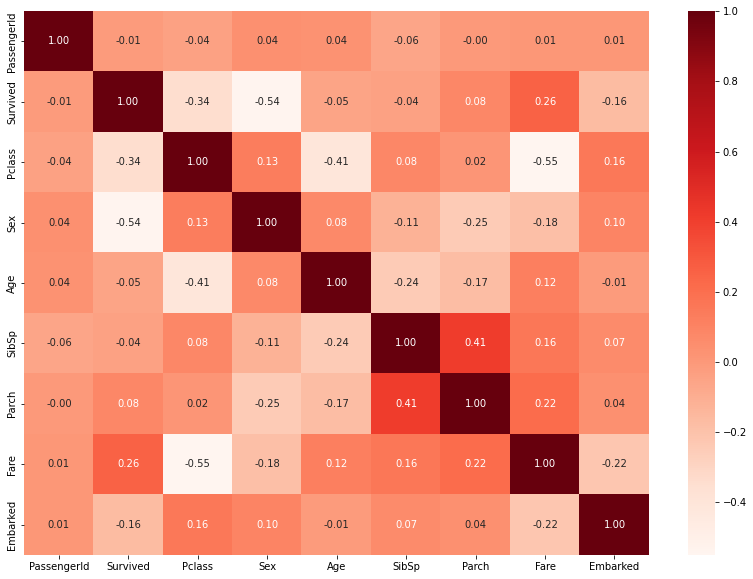

In [80]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

Observations from the heat map ;
1. There is a weak negative correlation between passagerId and survived
2. There is a weak negative correlation between Pclass and survived
3. There is a strong negative correlation between sex and survived.
4. There is a weak negative correlation between age and survived. 

### Multivariate Analysis

#### Feature Selection using LDA

In [81]:
# Separating our target label from the other features
feat= data.drop(['Survived'], axis= 1)
target = data['Survived']

#Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(feat, target)
lda_feat = lda_.transform(feat)

# Display the coefficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we need to create a dataframe so 
#that we can extract the name of the columns

f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=True)

,0
Sex,-3.554318
Pclass,-1.263892
SibSp,-0.299253
Embarked,-0.218885
Parch,-0.114985
Age,-0.043005
PassengerId,0.000082
Fare,0.001877


From LDA the most important feature with a high coeffient to the target variable are [sex,Pclass,SibSp,Embarked,Parch].
Feature with the Least coffentient to the target varaible and are less important are [Age,PassengerId,Fare].

### K-Nearest Neighbour Algorithm

In [82]:
#Split the Feature and target variables 
X =data[['Sex','Pclass','Embarked','Parch',]]
y = data['Survived']

In [83]:
#split to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [84]:
#import the KNeighborsClassifier class from the sklearn.neighbors library
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

#Make predictions on our test data
y_pred = classifier.predict(X_test)

#Evaluate model Performance 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[98 12]
 [25 44]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



*  The model has an accuracy of 79% .
*  Confusion matrix ;


1.  We have  true negative values of 98
2.  We have a false negative of 12
3. We have a false postive of 25
4. We have a True positive of 44


#### Repeating with different test and train distributions 

#####  70-30 distribution 

In [85]:
#split to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [86]:
#Fititng the best parameters
classifier = KNeighborsClassifier(n_neighbors=5)
#Train model 
classifier.fit(X_train,y_train)
#Predict using model 
Y_pred = classifier.predict(X_test)

In [87]:
#Evaluate model performance 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test, Y_pred))

[[157  11]
 [ 44  56]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       168
           1       0.84      0.56      0.67       100

    accuracy                           0.79       268
   macro avg       0.81      0.75      0.76       268
weighted avg       0.80      0.79      0.78       268



After change the test- train distribution to 30-70  the model accuracy is 79%
*  Confusion matrix ;

1.  We have  true negative values of 157
2.  We have a false negative of 11
3. We have a false postive of 44
4. We have a True positive of 56

#####  60-40 distribution 

In [88]:
#split to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [89]:
#Fititng the best parameters
classifier = KNeighborsClassifier(n_neighbors=5)
#Train model 
classifier.fit(X_train,y_train)
#Predict using model 
Y_pred = classifier.predict(X_test)

In [90]:
#Evaluate model performance 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test, Y_pred))

[[203  18]
 [ 53  83]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       221
           1       0.82      0.61      0.70       136

    accuracy                           0.80       357
   macro avg       0.81      0.76      0.78       357
weighted avg       0.80      0.80      0.79       357



After change the test- train distribution to 40-60  the model accuracy reduced to 80%
*  Confusion matrix ;

1.  We have  true negative values of 203
2.  We have a false negative of 18
3. We have a false postive of 53
4. We have a True positive of 83

In [99]:
#Model optimazation 
#split to train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Hyperparameter Tuning using random search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)

Best parameters: {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan'}


In [100]:
#Fititng the best parameters
knn_b = KNeighborsClassifier(n_neighbors=19, weights='distance',metric='manhattan')
#Train model 
knn_b.fit(X_train,y_train)
#Predict using model 
y_pred = knn_b.predict(X_test)

In [101]:
#Evaluate model performance 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[101   9]
 [ 26  43]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       110
           1       0.83      0.62      0.71        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



After performng hyperparameter tuning the accuracy of the model increased
*  The model has an accuracy of 80% .
*  Confusion matrix ;

1.  We have  true negative values of 109
2.  We have a false negative of 9
3. We have a false postive of 26
4. We have a True positive of 43